# Movies Analysis

### Imports

In [621]:
import pandas as pd
import matplotlib.pyplot as plt
movies = pd.read_csv('data/movies.csv')
import seaborn as sns
sns.set_theme()

In [622]:
movies.head(10)

,Movie Title,Runtime,Genre,Award Wins,Award Nominations,Box Office
0,Parasite,132,"Drama, Thriller",316,266,53369749
1,Green Book,130,"Biography, Comedy, Drama",58,123,85080171
2,The Shape of Water,123,"Drama, Fantasy, Romance",138,350,63859435
3,Moonlight,111,Drama,235,310,27854932
4,Spotlight,129,"Biography, Crime, Drama",124,144,45055776
5,Birdman or (The Unexpected Virtue of Ignorance),119,"Comedy, Drama",192,295,42340598
6,12 Years a Slave,134,"Biography, Drama, History",244,337,56671993
7,Argo,120,"Biography, Drama, History",96,156,136025503
8,The Artist,100,"Comedy, Drama, Romance",162,204,44671682
9,The King's Speech,118,"Biography, Drama, History",109,206,138797449


## Question 9.1
(Graph) What was the runtine for each movie?

**Strategy:**
- Make a really pretty Horizontal Bar plot.
- The more approachable the plot the more likely the data will be absorbed.
- Add labels if possible to more precisely answer the question.

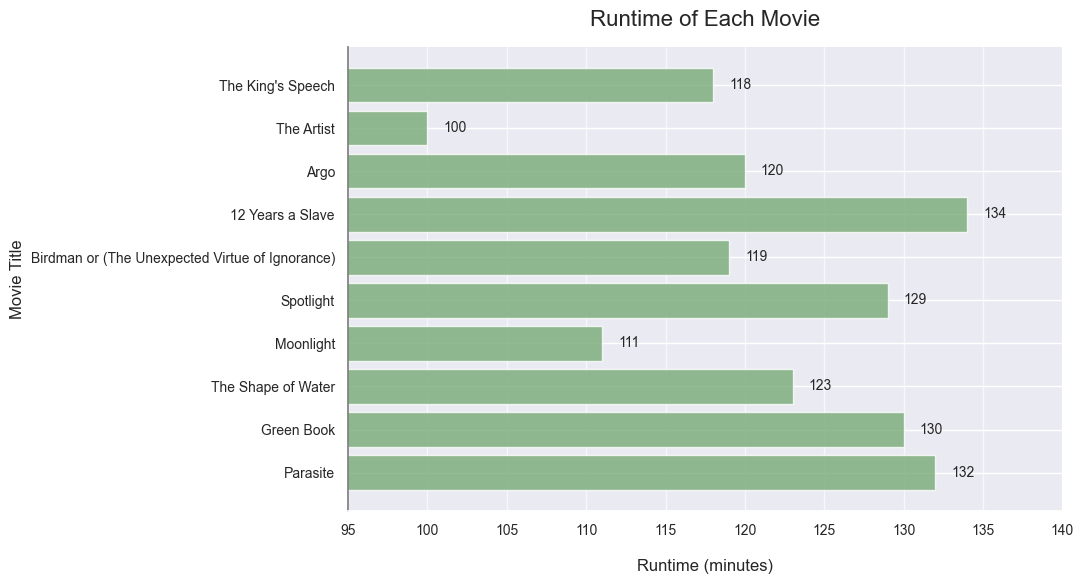

In [623]:
# Optimized size
plt.figure(figsize=(11, 6))

# horizontal bar plot
plt.barh(
    movies['Movie Title'],  # y-axis: movie titles
    movies['Runtime'],      # x-axis: runtimes
    color='#77AA77',        # Color
    alpha=0.8,              # Transparency
    edgecolor='#ffffff',    # White edges
    height=0.8              # Slight gap between bars
)

# Add runtime labels
for i, runtime in enumerate(movies['Runtime']):
    plt.text(
        runtime + 1,           # x-position: just to the right of the bar
        i,                     # y-position: center of the bar
        str(runtime),          # Text: exact runtime
        va='center',           # Vertical alignment: center
        fontsize=10,           # Font size
    )

# Customize the plot
plt.xlabel('Runtime (minutes)', fontsize=12, labelpad=15)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Runtime of Each Movie', fontsize=16, pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(95, 140)  # Adjust x-axis
plt.grid(axis='x', linestyle='-', color='#ffffff', alpha=0.7)

# Alter Axes spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['left'].set_color('gray')
# ax.spines['bottom'].set_color('gray')

# Prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

## Question 9.2
What movie had the longest runtime?

**Answer:**

Based on the horizontal bar plot above, the movie with the longest runtime is 12 Years a Slave, with a runtime of 134 minutes.

## Question 9.3
Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

**Strategy:**
- Calculate correlation coefficient

In [624]:
runtime_award_corr = movies['Runtime'].corr(movies['Award Wins'])
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.12


**Answer:**

Runtime and Award Wins have a very weak positive linear correlation. This suggests that as one increases the other does slightly, but it is not strong enough to be a meaningful conclusion.

## Question 9.4
(Graph) How many awards and nominations did each movie receive?

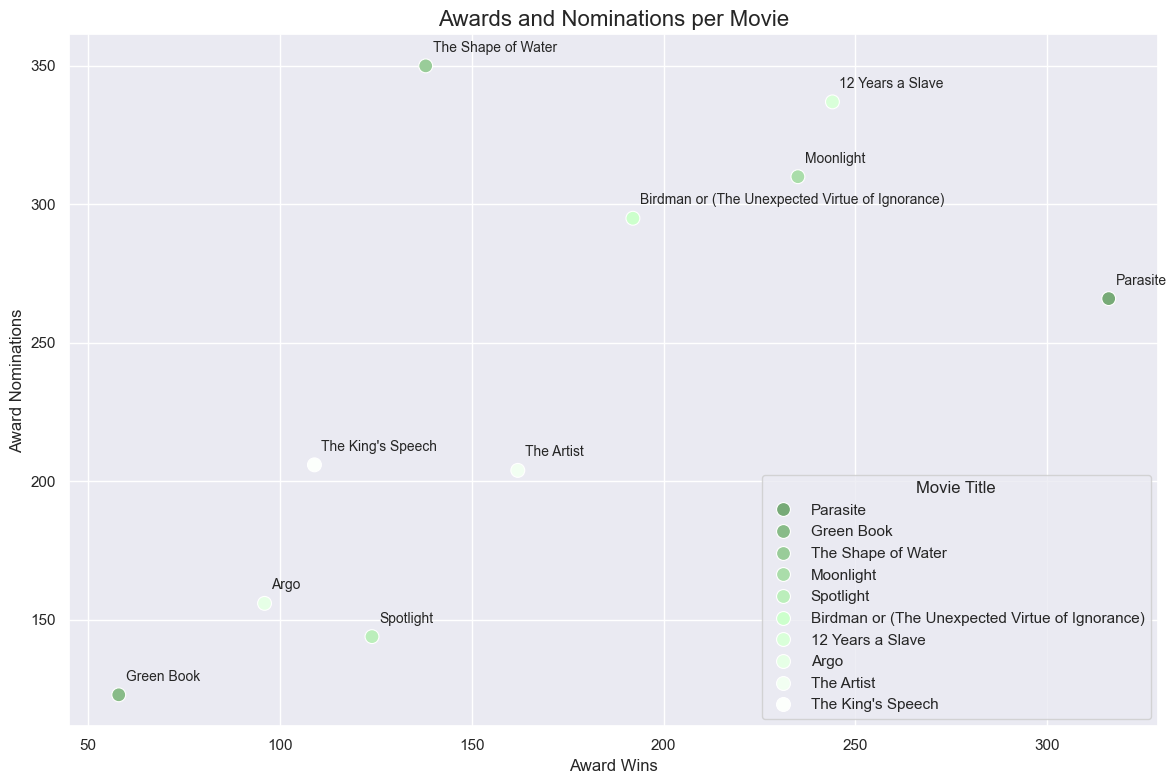

In [ ]:
colors = ['#77AA77', '#88BB88', '#99CC99', '#AADDAA', '#BBEEBB', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#FCFFFC']
plt.figure(figsize=(12, 8))

# Plot
sns.scatterplot(data=movies, 
                x=movies['Award Wins'], 
                y=movies['Award Nominations'], 
                hue='Movie Title', 
                s=100, 
                palette=colors, 
                edgecolor='#ffffff',
                color='#77AA77')

# Annotations
for i, txt in enumerate(movies['Movie Title']):
    plt.annotate(txt, (movies['Award Wins'][i], movies['Award Nominations'][i]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title('Awards and Nominations per Movie', fontsize=16)
plt.xlabel('Award Wins', fontsize=12)
plt.ylabel('Award Nominations', fontsize=12)
plt.tight_layout()
plt.show()